<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-2-Regression-Classification/blob/master/Sarmen_SInanian_assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your coefficients.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [1]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 133kB 17.1MB/s 
     |████████████████████████████████| 7.1MB 44.3MB/s 
     |████████████████████████████████| 614kB 42.5MB/s 
     |████████████████████████████████| 225kB 44.0MB/s 
     |████████████████████████████████| 768kB 27.0MB/s 
     |████████████████████████████████| 194kB 46.2MB/s 
     |████████████████████████████████| 51kB 20.7MB/s 
     |████████████████████████████████| 737kB 37.5MB/s 
     |████████████████████████████████| 51kB 19.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145036 sha256=d085e401477921e0650cefec3fdf5c890f3c7cc1e86eb7f9f5f8a5d39774f043
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=d3e57fd3d96797b739e0b709129ea0593bc12b59d83a6ad4ae048a3de1c0a60c
  Stored

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [0]:
%matplotlib inline
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
total_df = pd.concat([train_features,train_labels], axis=1)
total_df.dropna(axis=0, inplace=True)
# train_features_new = total_df


In [0]:
total_df = total_df.loc[:,~total_df.columns.duplicated()]

In [0]:
# train_labels_new = total_df[['id','status_group']]

#THE CODE BELOW SWAPS TOTAL_DF FOR TRAIN_FEATURES AND ALSO SWAPS TRAIN_LABELS_NEW FOR TRAIN_LABELS

In [8]:
# train_labels_new = total_df[['id','status_group']]
# total_df = total_df.loc[:, total_df.columns != 'status_group']
# total_df.columns

train_labels = total_df[['id','status_group']]
train_features = total_df.loc[:, total_df.columns != 'status_group']
total_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [9]:
total_df.shape, train_labels_new.shape

NameError: ignored

In [10]:
train_features.shape,train_labels.shape

((27813, 40), (27813, 2))

In [11]:
train_features.columns


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [0]:
# del train_labels_new['id']

In [13]:
train_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [14]:
train_features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [15]:
train_labels.columns

Index(['id', 'status_group'], dtype='object')

 # Do train/validate/test split with the Tanzania Waterpumps data.

In [16]:
X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
X_train, y_train, train_size = .8, test_size = .2,
stratify = y_train, random_state = 42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((22250, 40), (5563, 40), (22250,), (5563,))

In [17]:
y_train.value_counts(normalize=True)

functional                 0.577303
non functional             0.350337
functional needs repair    0.072360
Name: status_group, dtype: float64

In [18]:
y_val.value_counts(normalize=True)

functional                 0.577207
non functional             0.350351
functional needs repair    0.072443
Name: status_group, dtype: float64

#  Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)


In [19]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,22250,1,GeoData Consultants Ltd,22250
public_meeting,22250,2,True,20733
permit,22250,2,True,17489
source_class,22250,3,groundwater,14979
management_group,22250,5,user-group,19928
quantity_group,22250,5,enough,13452
quantity,22250,5,enough,13452
waterpoint_type_group,22250,6,communal standpipe,20089
quality_group,22250,6,good,20757
payment_type,22250,7,never pay,8022


In [20]:
X_train.quantity.value_counts()

enough          13452
insufficient     5682
dry              2313
seasonal          706
unknown            97
Name: quantity, dtype: int64

In [21]:
X_train.waterpoint_type_group.value_counts()

communal standpipe    20089
hand pump              1098
other                   952
improved spring          63
cattle trough            44
dam                       4
Name: waterpoint_type_group, dtype: int64

In [22]:
X_train.payment.value_counts()

never pay                8022
pay per bucket           4939
pay monthly              4754
pay annually             1775
unknown                  1649
pay when scheme fails     951
other                     160
Name: payment, dtype: int64

In [23]:
# REcombine X_train and y_train for exploratory data analysis
train = X_train.copy()
train['status_group'] = y_train

# Now do groupby
train.groupby('quantity')['status_group'].value_counts(normalize=True)

quantity      status_group           
dry           non functional             0.974492
              functional                 0.023346
              functional needs repair    0.002162
enough        functional                 0.696253
              non functional             0.227401
              functional needs repair    0.076346
insufficient  functional                 0.514960
              non functional             0.394579
              functional needs repair    0.090461
seasonal      functional                 0.671388
              non functional             0.237960
              functional needs repair    0.090652
unknown       non functional             0.742268
              functional                 0.257732
Name: status_group, dtype: float64

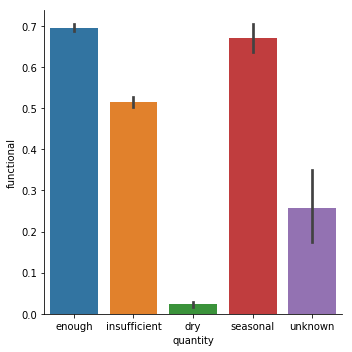

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train['functional'] = (train['status_group'] == 'functional').astype(int)

sns.catplot(x='quantity', y='functional', data=train, kind='bar')

In [25]:
X_train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [26]:
X_train.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [27]:
X_train_NONA = X_train
X_train_NONA.dropna(axis=0, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
X_train_NONA.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [29]:
X_train_NONA.shape

(22250, 40)

In [0]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#STANDARD SCALER GOOD FOR LINEAR MODELS

# DON'T HELP = management_group, permit, quality_group, extraction_type_group, extraction_type_class
categorical_features = ['quantity','payment_type', 'public_meeting', 'waterpoint_type', 'water_quality',
                        'extraction_type', 'basin', 'source', 'scheme_management', 'management','region', 'lga']
#ALWAYS DROP ID AND TARGETS FROM FEATURES
# numeric_features = X_train.select_dtypes('number').columns.drop('gps_height').tolist()
# DON'T HELP = construction_year, population, district_code, longitude, latitude
numeric_features = ['amount_tsh', 'gps_height', 'region_code']

In [31]:
# numeric_features = X_train
features = categorical_features + numeric_features

# Taking subset
X_train_subset = X_train[features]
X_val_subset = X_val[features]

# Encoding subset
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

# Scaling subset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Validation Accuracy 0.7718856731979148


Validation Accuracy 0.7718856731979148 from DROPPING NANs initially

Validation Accuracy 0.7519360269360269 from numeric_features = numeric_features = ['amount_tsh', 'gps_height', 'region_code']

0.7515993265993266

from # numeric_features = X_train.select_dtypes('number').columns.drop('gps_height').tolist()

In [32]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.7704476002157109


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning:

lbfgs failed to converge. Increase the number of iterations.



0.7497474747474747

#  Use scikit-learn for logistic regression.
 

# Get your validation accuracy score.


#  Get and plot your coefficients.


In [0]:
model.coef_

In [0]:
model.coef_[0]

In [0]:
# SHOWS POSITIVE AND NEGATIVE CORRELATIONS WITH THE TARGET I.E. POSITIVE IS CORRELATED WITH FUNCTIONAL PIPE
#  NEGATIVE IS CORRELATED WITH NON-FUNCTIONAL PIPE
functional_coefficients = pd.Series(
    model.coef_[0],
    X_train_encoded.columns
)

plt.figure(figsize=(10, 10))
functional_coefficients.sort_values().plot.barh();

#  Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue Submit Predictions button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)